# Интерпретация. Практическая работа

## Цель практической работы

Научиться интерпретировать модели кластеризации.

## Что входит в практическую работу


1. Загрузить данные и провести разведочный анализ.
2. Предположить оптимальное количество кластеров.
3. Очистить и подготовить данные для использования в моделях машинного обучения.
4. Построить модель кластеризации с помощью библиотеки Scikit-learn и вычислить оптимальное количество кластеров.
5. Визуализировать результаты кластеризации.
6. Интерпретировать полученные результаты.
7. Подкрепить выводы интерпретации визуализациями.

## Что оценивается 

* Выполнены все этапы работы.
* Сделаны выводы по результатам разведочного анализа данных.
* Выполнена и обоснована подготовка данных.
* Выбор количества кластеров обоснован и подкреплён визуализацией. 
* Выбор гиперпараметров метода понижения размерности обоснован.
* Интерпретация кластеров подкреплена расчётами и визуализацией. 



# Задача

У вас имеется некоторый набор данных `marketing_campaign.csv` о покупателях супермаркета.

* ID — уникальный идентификатор клиента.
* Year_Birth — год рождения клиента.
* Dt_Customer — дата регистрации клиента на сайте.
* Recency — количество дней с момента последней покупки клиента.
* MntFruits — сумма, потраченная на фрукты за последние два года.
* MntMeatProducts — сумма, потраченная на мясо за последние два года.
* MntFishProducts — сумма, потраченная на рыбу за последние два года.
* MntSweetProducts — сумма, потраченная на сладости за последние два года.
* NumWebPurchases — количество покупок, совершённых через сайт.
* NumStorePurchases — количество покупок, совершённых непосредственно в магазинах.
* Response: 1, если клиент участвовал в последней рекламной кампании, 0 — в противном случае.

Решите задачу кластеризации покупателей, чтобы в дальнейшем планировать маркетинговые акции для каждой группы покупателей. Подготовьте результаты своей работы для демонстрации заказчику, не погружённому в машинное обучение.

# Задание 1

Загрузите датасет и выполните разведочный анализ данных. Сделайте выводы о найденных закономерностях, особенностях и других свойствах данных, которые вы обнаружите.

In [1]:
# Загрузим Датафрейм и посмотрим на первые 5 строк

import pandas as pd
import numpy as np
import warnings

warnings.filterwarnings('ignore')

data = pd.read_csv('marketing campaign.csv')
data.head()

,ID,Year_Birth,Dt_Customer,Recency,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,NumWebPurchases,NumStorePurchases,Response
0,5524,1957,04-09-2012,58,88,546,172,88,8,4,1
1,2174,1954,08-03-2014,38,1,6,2,1,1,2,0
2,4141,1965,21-08-2013,26,49,127,111,21,8,10,0
3,6182,1984,10-02-2014,26,4,20,10,3,2,4,0
4,5324,1981,19-01-2014,94,43,118,46,27,5,6,0


In [2]:
# Проверим наличие пустот

data.isna().sum()

ID                   0
Year_Birth           0
Dt_Customer          0
Recency              0
MntFruits            0
MntMeatProducts      0
MntFishProducts      0
MntSweetProducts     0
NumWebPurchases      0
NumStorePurchases    0
Response             0
dtype: int64

In [18]:
data.shape

(2240, 11)

In [3]:
# Выведем информацию о датафрейме. Видим что дата регестрации в строчном формате. Нужно будет поработаь над этим. Дубликаты так же не обнаружены

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ID                 2240 non-null   int64 
 1   Year_Birth         2240 non-null   int64 
 2   Dt_Customer        2240 non-null   object
 3   Recency            2240 non-null   int64 
 4   MntFruits          2240 non-null   int64 
 5   MntMeatProducts    2240 non-null   int64 
 6   MntFishProducts    2240 non-null   int64 
 7   MntSweetProducts   2240 non-null   int64 
 8   NumWebPurchases    2240 non-null   int64 
 9   NumStorePurchases  2240 non-null   int64 
 10  Response           2240 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 192.6+ KB


In [4]:
# Посмотрим на распределение данных

data.describe()

# Видим что есть покупки сильно больше обычных

,ID,Year_Birth,Recency,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,NumWebPurchases,NumStorePurchases,Response
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,49.109375,26.302232,166.950000,37.525446,27.062946,4.084821,5.790179,0.149107
std,3246.662198,11.984069,28.962453,39.773434,225.715373,54.628979,41.280498,2.778714,3.250958,0.356274
min,0.000000,1893.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2828.250000,1959.000000,24.000000,1.000000,16.000000,3.000000,1.000000,2.000000,3.000000,0.000000
50%,5458.500000,1970.000000,49.000000,8.000000,67.000000,12.000000,8.000000,4.000000,5.000000,0.000000
75%,8427.750000,1977.000000,74.000000,33.000000,232.000000,50.000000,33.000000,6.000000,8.000000,0.000000
max,11191.000000,1996.000000,99.000000,199.000000,1725.000000,259.000000,263.000000,27.000000,13.000000,1.000000


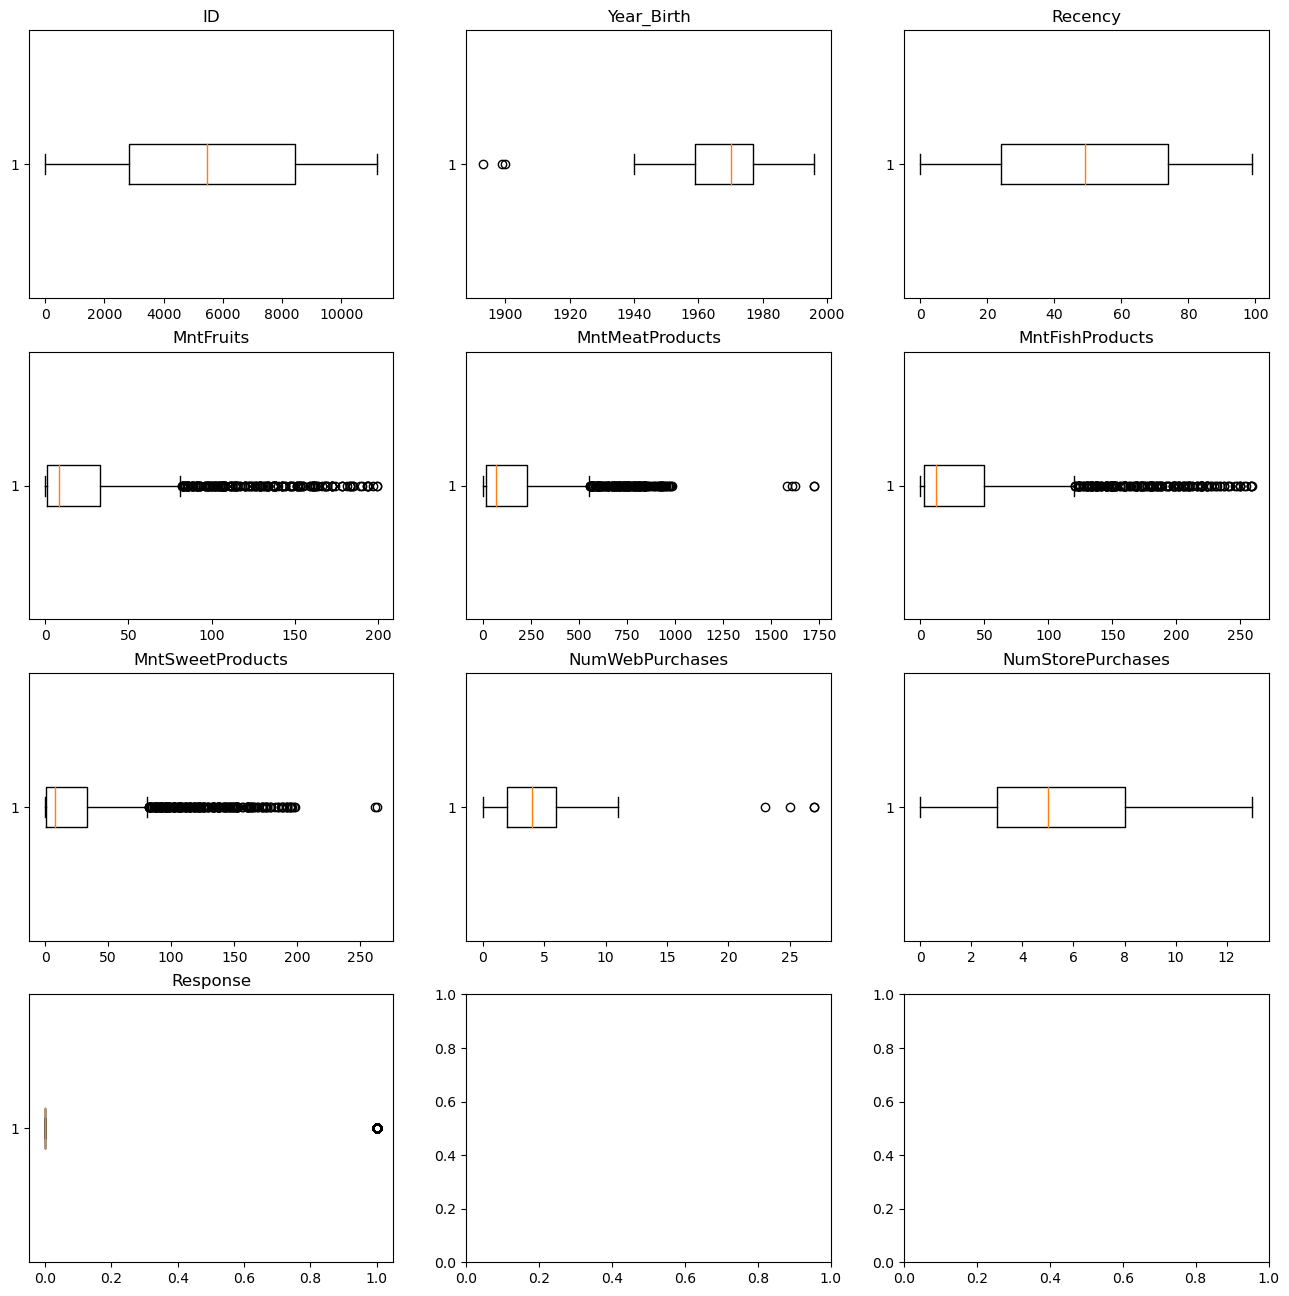

In [13]:
# Визуализируем и посмотрим на коробочные графики

import matplotlib.pyplot as plt

def boxplot_for_columns(df):
    selected_cols = df.select_dtypes(include=['int', 'float']).columns
    num_cols = min(3, len(selected_cols))
    num_rows = (len(selected_cols) - 1) // num_cols + 1

    if len(selected_cols) > 0:
        fig, ax = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(16, 4*num_rows))
        for i, col in enumerate(selected_cols):
            ax_row, ax_col = divmod(i, num_cols)
            ax[ax_row, ax_col].boxplot(df[col], vert=False)
            ax[ax_row, ax_col].set_title(col)
        plt.show()
    else:
        print("Во фрейме данных не найдено числовых столбцов")

boxplot_for_columns(data)

Визуально видим ненормальное распределение данных на коробочном графике. Рассмотрим каджую по отдельности

In [15]:
# Видим выбивающиеся годы рождения. Посмотрим на них в датафрейме

data.sort_values(by='Year_Birth', ascending=True).head(30)

# Видим очень пожилых людей(мне бы такие тараты на мясо в 125 лет). Возможно выбросы.(а может ли быть так что их скидочными карточками пользуются дети и внуки)

,ID,Year_Birth,Dt_Customer,Recency,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,NumWebPurchases,NumStorePurchases,Response
239,11004,1893,17-05-2014,23,0,5,7,0,1,2,0
339,1150,1899,26-09-2013,36,144,562,104,64,4,4,0
192,7829,1900,26-09-2013,99,6,8,7,4,2,2,0
1950,6663,1940,08-07-2013,96,0,7,0,0,3,4,0
424,6932,1941,13-04-2013,77,42,716,55,0,7,5,0
1150,1453,1943,06-07-2013,59,40,183,52,20,9,13,0
415,7106,1943,31-03-2014,73,0,591,156,0,3,10,0
2084,5250,1943,30-10-2013,75,126,490,164,126,5,11,1
358,6142,1943,20-08-2013,65,17,177,69,0,5,5,0
1923,4994,1943,01-10-2013,53,33,281,129,66,7,13,0


In [19]:
data.sort_values(by='MntFruits', ascending=False).head(30)

# Распределение обычное, убывание линейное для фруктов

,ID,Year_Birth,Dt_Customer,Recency,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,NumWebPurchases,NumStorePurchases,Response
855,1456,1979,01-04-2013,25,199,303,234,9,10,12,0
1480,2849,1979,01-04-2013,25,199,303,234,9,10,12,0
1508,3967,1971,25-10-2013,19,197,170,58,152,2,13,0
1526,202,1948,05-04-2014,54,194,377,149,125,4,7,0
2217,9589,1948,05-04-2014,54,194,377,149,125,4,7,0
109,10991,1960,07-12-2012,18,194,106,31,22,5,4,0
1946,10676,1982,02-11-2012,3,193,459,205,26,3,7,1
1921,3283,1972,19-01-2014,57,193,100,46,185,6,12,0
447,1137,1964,29-12-2013,87,190,537,61,156,4,7,0
198,6422,1954,17-01-2013,20,189,482,50,33,5,5,0


In [20]:
data.sort_values(by='MntMeatProducts', ascending=False).head(30)

# Видим несколько людей очень любящие мясо. Но которые ничего больше не берут. Возможно выбросы в виде первых 5 покупателей

,ID,Year_Birth,Dt_Customer,Recency,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,NumWebPurchases,NumStorePurchases,Response
1653,4931,1977,29-04-2013,13,0,1725,2,1,0,0,0
21,5376,1979,06-01-2013,42,1,1725,1,1,0,0,0
687,1501,1982,04-08-2012,21,16,1622,17,3,0,1,0
2228,8720,1978,12-08-2012,53,2,1607,12,4,0,1,0
164,8475,1973,01-03-2014,98,2,1582,1,2,0,0,0
1358,1065,1963,29-12-2013,85,129,984,193,37,5,5,0
1808,1619,1956,28-04-2014,2,51,981,224,23,4,6,1
456,4947,1966,15-09-2012,44,24,974,197,194,7,9,1
2109,3104,1961,17-09-2012,89,59,968,51,79,5,12,1
1031,9220,1971,17-01-2013,58,172,961,125,115,8,5,1


In [21]:
data.sort_values(by='MntFishProducts', ascending=False).head(30)

# Распределение обычное, убывание линейное для рыбных продуктов

,ID,Year_Birth,Dt_Customer,Recency,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,NumWebPurchases,NumStorePurchases,Response
1199,7342,1961,09-09-2012,6,142,113,259,151,6,12,0
1644,3091,1981,02-05-2014,27,21,134,258,14,7,8,0
1799,762,1981,02-05-2014,27,21,134,258,14,7,8,0
1699,4676,1951,05-03-2014,86,91,520,258,107,9,8,0
214,0,1985,04-05-2013,66,10,554,254,87,3,9,0
1601,5453,1956,26-09-2012,26,108,649,253,151,4,12,0
914,10619,1994,03-12-2012,29,29,890,250,27,7,7,1
926,2008,1978,10-02-2014,93,23,384,250,12,4,9,0
2096,7428,1975,30-09-2013,47,132,445,250,192,3,8,0
766,5331,1977,11-09-2012,8,51,898,247,0,3,7,0


In [22]:
data.sort_values(by='MntSweetProducts', ascending=False).head(30)

# Для сладостей рост обычный линейный, судя по году рождения любят радовать внуков. 
# Но очень странно что траты почти что только на сладости у первых двух. Возможно выбросы

,ID,Year_Birth,Dt_Customer,Recency,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,NumWebPurchases,NumStorePurchases,Response
27,5255,1986,20-02-2013,19,1,3,3,263,27,0,0
1898,4619,1945,28-05-2014,9,2,3,1,262,27,0,0
634,8923,1973,18-04-2013,12,22,732,42,198,6,7,1
1513,9264,1986,27-04-2014,1,42,706,73,197,4,9,0
1671,1964,1951,05-09-2013,66,107,768,33,196,5,6,0
1253,961,1972,12-09-2013,92,27,421,13,195,7,5,0
1484,8370,1976,02-08-2012,50,97,259,197,194,7,6,0
2012,500,1977,06-08-2013,79,43,735,40,194,7,9,1
456,4947,1966,15-09-2012,44,24,974,197,194,7,9,1
2096,7428,1975,30-09-2013,47,132,445,250,192,3,8,0


In [23]:
data.sort_values(by='NumWebPurchases', ascending=False).head(30)

# Пологаю что не многие любят заказывать онлайн. Пологаю анамалии у первых 4-х покупателей

,ID,Year_Birth,Dt_Customer,Recency,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,NumWebPurchases,NumStorePurchases,Response
27,5255,1986,20-02-2013,19,1,3,3,263,27,0,0
1898,4619,1945,28-05-2014,9,2,3,1,262,27,0,0
1975,10311,1969,05-10-2013,0,4,12,2,4,25,0,0
1806,6237,1966,07-12-2013,92,4,33,5,2,23,1,0
1022,6059,1953,04-03-2013,81,36,168,16,0,11,4,1
2030,3945,1947,10-03-2013,80,44,215,0,17,11,4,1
2033,3491,1975,29-04-2013,32,60,364,119,101,11,8,0
983,3056,1978,14-10-2013,63,43,337,42,87,11,9,0
202,8727,1978,14-10-2013,63,43,337,42,87,11,9,0
937,1204,1970,22-05-2013,45,0,447,23,71,11,11,0


По итогу мы узнали что присудствуют выбросы. Распределение в целом нормальное. Данных не так много. Нужно порабоать над датой регистрации

# Задание 2

Метод k-средних требует явно задать количество кластеров, на которые будут разбиваться данные. Данных может быть так много, что построение одной модели будет занимать несколько часов, поэтому важно заранее примерно представлять количество кластеров до запуска обучения модели.

На основе проведённого разведочного анализа данных предположите, какое количество кластеров будет оптимальным, аргументируйте своё предположение.

Напишите ваш ответ ниже


# Задание 3

Выполните очистку и подготовку данных для дальнейшего использования при построении моделей машинного обучения. Аргументируйте выбранные шаги подготовки данных. 

In [26]:
# Сначало создадим копию изначального датафрейма

df = data.copy()

In [27]:
# Удалим колонку с айди

df = df.drop('ID', axis=1)

In [33]:
# Удалим выбросы(как мне кажеться) по индексу

index_to_drop = [27, 1898, 1653, 21, 687, 2228, 164, 239, 339, 192]
df = df.drop(index_to_drop, errors='ignore')

In [29]:
# Преобразуем строковую колонку даты регистрации в числовую день месяц год

# Преобразуем столбец Dt_Customer в формат даты
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format="%d-%m-%Y")

# Извлечем год, месяц и день регистрации
df['Year_Customer'] = df['Dt_Customer'].dt.year
df['Month_Customer'] = df['Dt_Customer'].dt.month
df['Day_Customer'] = df['Dt_Customer'].dt.day

# Удалим столбец Dt_Customer
df = df.drop('Dt_Customer', axis=1)

# Посмотрим информацию о датафрейме
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Year_Birth         2240 non-null   int64
 1   Recency            2240 non-null   int64
 2   MntFruits          2240 non-null   int64
 3   MntMeatProducts    2240 non-null   int64
 4   MntFishProducts    2240 non-null   int64
 5   MntSweetProducts   2240 non-null   int64
 6   NumWebPurchases    2240 non-null   int64
 7   NumStorePurchases  2240 non-null   int64
 8   Response           2240 non-null   int64
 9   Year_Customer      2240 non-null   int32
 10  Month_Customer     2240 non-null   int32
 11  Day_Customer       2240 non-null   int32
dtypes: int32(3), int64(9)
memory usage: 183.9 KB


In [30]:
# Преобразуем весь датафрейм в int32 для экономии времени и вычеслительных мощьностей(да данных мал просто хочу поэкспериментировать)

df = df.astype('int32')

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2230 entries, 0 to 2239
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Year_Birth         2230 non-null   int32
 1   Recency            2230 non-null   int32
 2   MntFruits          2230 non-null   int32
 3   MntMeatProducts    2230 non-null   int32
 4   MntFishProducts    2230 non-null   int32
 5   MntSweetProducts   2230 non-null   int32
 6   NumWebPurchases    2230 non-null   int32
 7   NumStorePurchases  2230 non-null   int32
 8   Response           2230 non-null   int32
 9   Year_Customer      2230 non-null   int32
 10  Month_Customer     2230 non-null   int32
 11  Day_Customer       2230 non-null   int32
dtypes: int32(12)
memory usage: 122.0 KB


In [34]:
df.describe()

,Year_Birth,Recency,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,NumWebPurchases,NumStorePurchases,Response,Year_Customer,Month_Customer,Day_Customer
count,2230.000000,2230.000000,2230.000000,2230.000000,2230.000000,2230.000000,2230.000000,2230.000000,2230.000000,2230.000000,2230.000000,2230.000000
mean,1968.884753,49.144395,26.342152,163.733632,37.624215,26.913453,4.075785,5.811659,0.149776,2013.027803,6.472197,15.632735
std,11.695313,28.946784,39.756560,214.689973,54.694679,40.735699,2.690911,3.241228,0.356932,0.684467,3.488736,8.784295
min,1940.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2012.000000,1.000000,1.000000
25%,1959.000000,24.000000,1.250000,16.000000,3.000000,1.000000,2.000000,3.000000,0.000000,2013.000000,3.000000,8.000000
50%,1970.000000,49.500000,8.000000,67.000000,12.000000,8.000000,4.000000,5.000000,0.000000,2013.000000,6.000000,16.000000
75%,1977.000000,74.000000,33.000000,230.000000,50.000000,33.000000,6.000000,8.000000,0.000000,2013.000000,10.000000,23.000000
max,1996.000000,99.000000,199.000000,984.000000,259.000000,198.000000,25.000000,13.000000,1.000000,2014.000000,12.000000,31.000000


# Задание 4

Постройте модель кластеризации с помощью метода k-средних. Определите оптимальное количество кластеров с помощью метода локтя и метрики silhouette score. 

Помните, что аналитический способ определения количества кластеров не является единственно верным. Если ваше понимание предметной области и результаты анализа данных расходятся с результатами метода локтя, вы можете выбрать и обосновать количество кластеров, исходя из своего опыта.

In [51]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler


# Масштабирование признаков
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# Определение оптимального количества кластеров с помощью метода локтя
wcss = []  # Сумма квадратов внутри кластера

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

# Построение графика локтя
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Метод локтя')
plt.xlabel('Количество кластеров')
plt.ylabel('Сумма квадратов внутри кластера (WCSS)')
plt.show()

SyntaxError: incomplete input (1888019524.py, line 26)

По методу локтя можем сказать что после 5 увеличивать кластеры не имеет большого смысла

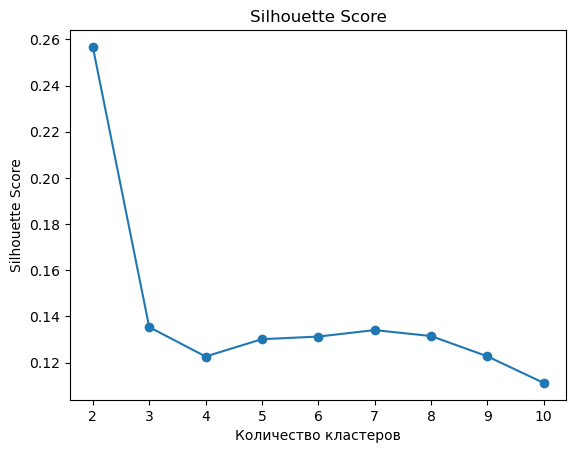

In [38]:
# Определение оптимального количества кластеров с помощью silhouette score
silhouette_scores = []

for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df_scaled)
    silhouette_scores.append(silhouette_score(df_scaled, kmeans.labels_))

# Построение графика silhouette score
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Score')
plt.xlabel('Количество кластеров')
plt.ylabel('Silhouette Score')
plt.show()

В свою очередь Silhouette Score говорит нам о том что 4 это самое оптимальное количество кластеров для данного датафрейма

# Задание 5

Визуализируйте результаты кластеризации на двумерном графике с помощью метода t-SNE. Обоснуйте выбранные значения его гиперпараметров.

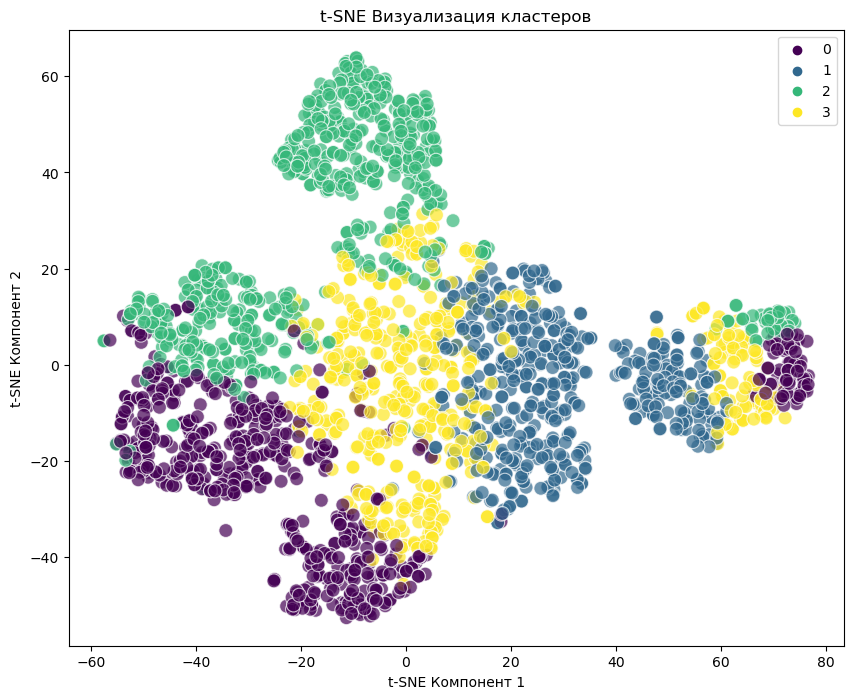

In [42]:
from sklearn.manifold import TSNE


# Кластеризация с выбранным оптимальным количеством кластеров
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(df_scaled)

# Применение t-SNE для визуализации в двумерном пространстве
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(df_scaled)

# Добавление меток кластеров к данным
df['Cluster'] = kmeans.labels_

# Визуализация результатов
plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=df['Cluster'], palette='viridis', s=100, alpha=0.7)
plt.title('t-SNE Визуализация кластеров')
plt.xlabel('t-SNE Компонент 1')
plt.ylabel('t-SNE Компонент 2')
plt.legend()
plt.show()


In [46]:
import plotly.express as px


tsne = TSNE(n_components=3, random_state=42)
X_tsne = tsne.fit_transform(df_scaled)

# Добавление меток кластеров к данным
df['Cluster'] = kmeans.labels_

# Визуализация результатов в трехмерном пространстве с помощью plotly
fig = px.scatter_3d(df, x=X_tsne[:, 0], y=X_tsne[:, 1], z=X_tsne[:, 2], color='Cluster', opacity=0.7,
                    labels={'color': 'Cluster'}, title='t-SNE 3D Визуализация кластеров')
fig.show()

# Задание 6

Постройте профили кластеров и опишите их.

In [49]:
km = KMeans(n_clusters=4, random_state=42)
km.fit(df)

# Получим предикт
df['Cluster'] = km.fit_predict(df)
optimal_k = 4

# Получим центроиды
centers = km.cluster_centers_

# Создадим DataFrame с центроидами
centroid_df = pd.DataFrame(centers, columns=df.columns)

# Выводим информацию о центроидах
print("Centroids:")
print(centroid_df)

# Опишите типичного представителя каждой группы
for i in range(optimal_k):
    print(f"\nCluster {i} Profile:")
    print(df[df['Cluster'] == i].mean())

Centroids:
    Year_Birth    Recency  MntFruits  MntMeatProducts  MntFishProducts  \
0  1969.698699  48.804191   6.666908        35.553468         9.127168   
1  1968.608541  50.818505  63.704626       453.099644        97.124555   
2  1966.301149  48.131034  50.209195       199.935632        71.108046   
3  1969.461538  52.538462  75.184615       781.746154       100.353846   

   MntSweetProducts  NumWebPurchases  NumStorePurchases  Response  \
0          6.500723         3.093931           4.143064  0.101879   
1         65.298932         5.113879           8.359431  0.241993   
2         53.112644         6.179310           8.680460  0.160920   
3         73.592308         5.246154           8.469231  0.423077   

   Year_Customer  Month_Customer  Day_Customer  Cluster  
0    2013.077312        6.424133     15.802023  0.00289  
1    2013.042705        6.523132     15.124555  1.00000  
2    2012.898851        6.526437     15.177011  2.00000  
3    2012.900000        6.692308     16.

# Общие наблюдения:

Кластер 0: Покупатели в этом кластере в основном моложе, с более низкой частотой покупок и тратами на продукты. Они реже отвечают на маркетинговые предложения.

Кластер 1: Этот кластер представлен клиентами с высокими значениями по всем категориям трат, более старшего возраста. Они активно участвуют в веб-покупках и имеют более высокую вероятность реагировать на маркетинг.

Кластер 2: Здесь покупатели также тратят много, но менее, чем в кластере 1. Имеют средний возраст и предпочтения по товарам.

Кластер 3: Этот кластер представлен клиентами с самыми высокими значениями по категории "MntMeatProducts". Они также более старших лет, средние по частоте покупок и числу магазинов, но более склонны к реагированию на маркетинг.

# Рекомендации:

Кластер 0: Можно сосредоточиться на маркетинговых стратегиях для привлечения молодых покупателей и увеличения их частоты покупок.

Кластер 1: Этот сегмент является ключевым и может потребовать дополнительных маркетинговых усилий, так как клиенты в нем более активны в трате и реагировании на предложения.

Кластер 2: Нужно сосредоточиться на поддержание лояльности этого сегмента, предлагая персонализированные предложения и продукты, соответствующие их предпочтениям.

Кластер 3: Этот сегмент также интересен, особенно в продаже мясных продуктов. Можно предоставить им дополнительные возможности для участия в маркетинговых акциях.

# Задание 7

Визуализируйте профили кластеров. Подготовьте краткое резюме результатов вашего исследования для заказчика.

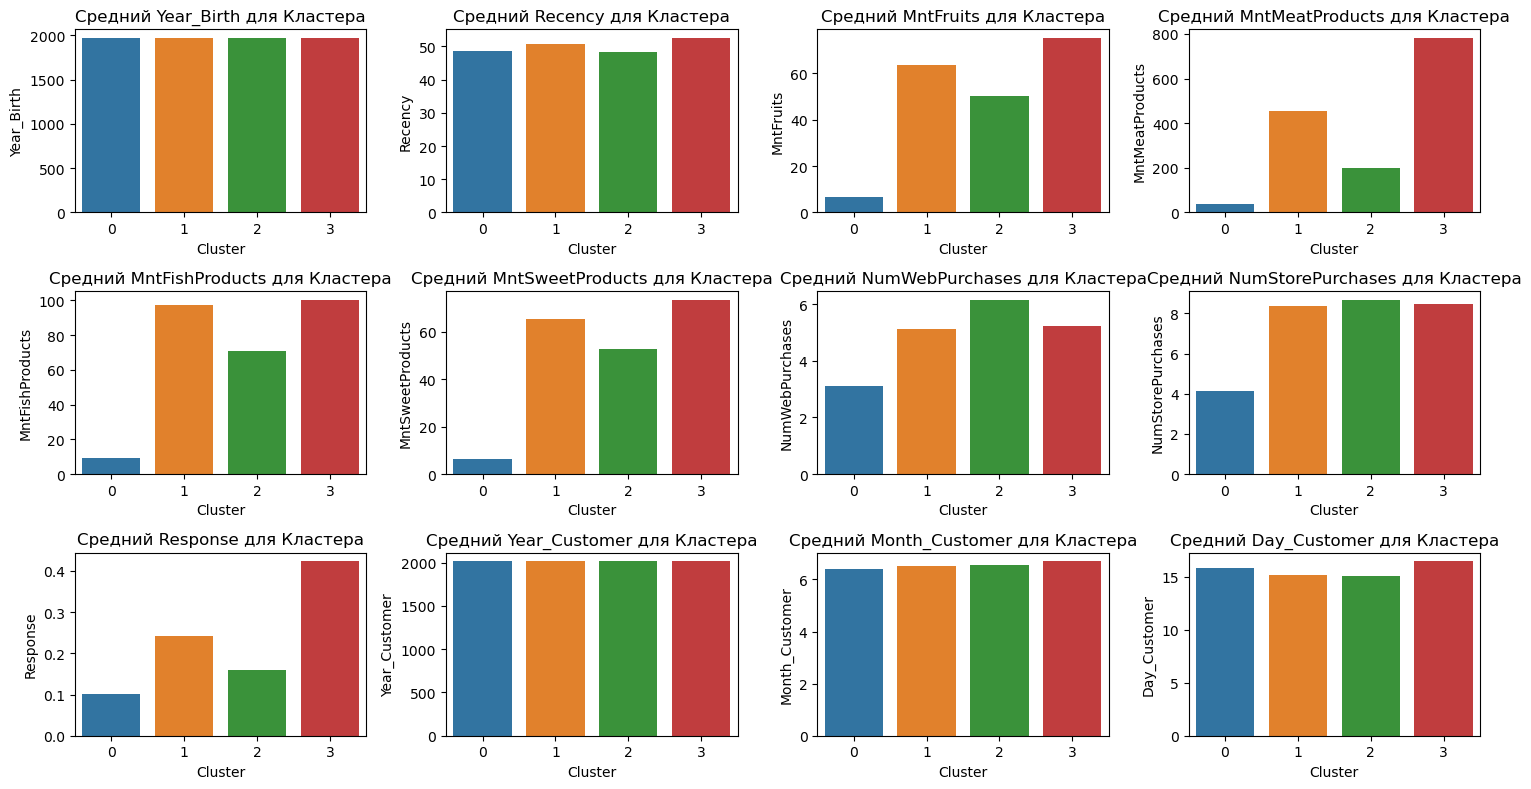

In [50]:
# Сгруппируем данные по кластерам и вычислим средние значения
cluster_means = df.groupby('Cluster').mean().reset_index()

# Построим графики
plt.figure(figsize=(15, 8))
for i, column in enumerate(df.columns[:-1]):  # исключаем колонку 'Cluster'
    plt.subplot(3, 4, i + 1)
    sns.barplot(x='Cluster', y=column, data=cluster_means)
    plt.title(f'Средний {column} для Кластера')

plt.tight_layout()
plt.show()

Age (Год рождения): Кластер 1 представлен более старшими клиентами, в то время как кластер 0 состоит из более молодых клиентов.

Recency (Период с последней покупки): Кластер 3 имеет наивысшую среднюю Recency, что указывает на более давних клиентов.

MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts (Расходы на фрукты, мясо, рыбу, сладости): Кластер 3 тратит наибольшее количество средств на продукты, особенно на мясо.

NumWebPurchases, NumStorePurchases (Количество покупок в интернете и в магазинах): Кластер 2 лидирует в этих категориях, что указывает на более активное участие в покупках.

Response (Ответ на маркетинговые предложения): Кластер 3 имеет наивысшую среднюю вероятность ответа на маркетинговые предложения.

## Как отправить работу на проверку

Скачайте файл с заданием в материалах, откройте его через Jupyter Notebook и выполните задания. Сохраните изменения при помощи опции Save and Checkpoint из вкладки меню File или кнопки Save and Checkpoint на панели инструментов. Отправьте через форму ниже итоговый файл Jupyter Notebook (.ipynb) или ссылку на него.